In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


In [43]:
# import data
ny = pd.read_csv('NY-House-Dataset.csv')
ny

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


In [44]:
# find missing values
missing = ny.isnull().sum()
missing

,0
BROKERTITLE,0
TYPE,0
PRICE,0
BEDS,0
BATH,0
PROPERTYSQFT,0
ADDRESS,0
STATE,0
MAIN_ADDRESS,0
ADMINISTRATIVE_AREA_LEVEL_2,0


In [45]:
#find columns to drop
ny_status = ny.drop(columns=['BROKERTITLE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS',
    'ADMINISTRATIVE_AREA_LEVEL_2', 'LONG_NAME', 'FORMATTED_ADDRESS'])
ny_status

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,LOCALITY,SUBLOCALITY,STREET_NAME,LATITUDE,LONGITUDE
0,Condo for sale,315000,2,2.000000,1400.000000,New York,Manhattan,East 55th Street,40.761255,-73.974483
1,Condo for sale,195000000,7,10.000000,17545.000000,New York,New York County,New York,40.766393,-73.980991
2,House for sale,260000,4,2.000000,2015.000000,New York,Richmond County,Staten Island,40.541805,-74.196109
3,Condo for sale,69000,3,1.000000,445.000000,New York,New York County,New York,40.761398,-73.974613
4,Townhouse for sale,55000000,7,2.373861,14175.000000,New York,New York County,New York,40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...
4796,Co-op for sale,599000,1,1.000000,2184.207862,New York County,New York,Manhattan,40.774350,-73.955879
4797,Co-op for sale,245000,1,1.000000,2184.207862,New York,Queens County,Queens,40.732538,-73.860152
4798,Co-op for sale,1275000,1,1.000000,2184.207862,New York,New York County,New York,40.745882,-74.003398
4799,Condo for sale,598125,2,1.000000,655.000000,Queens County,Queens,Flushing,40.742770,-73.872752


In [46]:
categorical_cols = ['TYPE','LOCALITY','SUBLOCALITY', 'STREET_NAME']
numerical_cols = ['PRICE','BEDS','BATH','PROPERTYSQFT','LATITUDE','LONGITUDE']

#one-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(ny_status[categorical_cols])

#create a dataframe from encoded data
encoded_columns = encoder.get_feature_names_out(categorical_cols)
df_encoded = pd.DataFrame(encoded_data, columns=encoded_columns, index=ny_status.index)

#Combine numerical data and encoded categorical data
x = pd.concat([ny_status[numerical_cols], df_encoded], axis=1)
y = ny_status['PRICE']
df_encoded

,TYPE_Coming Soon,TYPE_Condo for sale,TYPE_Condop for sale,TYPE_Contingent,TYPE_For sale,TYPE_Foreclosure,TYPE_House for sale,TYPE_Land for sale,TYPE_Mobile house for sale,TYPE_Multi-family home for sale,...,STREET_NAME_West 65th Street,STREET_NAME_West Brighton,STREET_NAME_West Bronx,STREET_NAME_Westchester Square,STREET_NAME_Whitestone,STREET_NAME_Williamsburg,STREET_NAME_Windsor Terrace,STREET_NAME_Woodhaven,STREET_NAME_Woodside,STREET_NAME_Woodstock
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4799,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [48]:
# Initialize logistic regression model
logistic_model = LogisticRegression(max_iter=100, random_state=42)

#fit the model on the training data
logistic_model.fit(x_train, y_train)
# predict on the testing set
y_pred = logistic_model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
#display classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

#Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.00
Classification Report:
               precision    recall  f1-score   support

        5800       0.00      0.00      0.00       1.0
       49500       0.00      0.00      0.00       1.0
       65000       0.00      0.00      0.00       1.0
       69000       0.00      0.00      0.00       1.0
       69900       0.00      0.00      0.00       1.0
       75000       0.00      0.00      0.00       1.0
       99000       0.00      0.00      0.00       4.0
      100000       0.00      0.00      0.00       1.0
      109000       0.00      0.00      0.00       1.0
      110000       0.00      0.00      0.00       1.0
      119000       0.00      0.00      0.00       1.0
      119888       0.00      0.00      0.00       1.0
      125000       0.00      0.00      0.00       2.0
      130000       0.00      0.00      0.00       1.0
      140000       0.00      0.00      0.00       2.0
      149000       0.00      0.00      0.00       2.0
      149999       0.00      0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [50]:
#intialize the DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

#Fit the model on the training data
decision_tree.fit(x_train, y_train)
#Predict on the testing set
y_pred = decision_tree.predict(x_test)

predictions=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
predictions

,Actual,Predicted
596,750000,750000
4507,899000,899000
3049,5900000,999000
2957,1695000,999000
8,265000,499000
...,...,...
2669,749000,750000
3094,1400000,999000
2658,999000,999000
2809,925000,999000


In [51]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

#Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

#Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.07


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

        5800       0.00      0.00      0.00         1
       49500       0.00      0.00      0.00         1
       65000       0.00      0.00      0.00         1
       69000       0.00      0.00      0.00         1
       69900       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
       99000       0.00      0.00      0.00         4
      100000       0.00      0.00      0.00         1
      109000       0.00      0.00      0.00         1
      110000       0.00      0.00      0.00         1
      119000       0.00      0.00      0.00         1
      119888       0.00      0.00      0.00         1
      125000       0.00      0.00      0.00         2
      130000       0.00      0.00      0.00         1
      140000       0.00      0.00      0.00         2
      149000       0.00      0.00      0.00         2
      149999       0.00      0.00      0.00         1
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


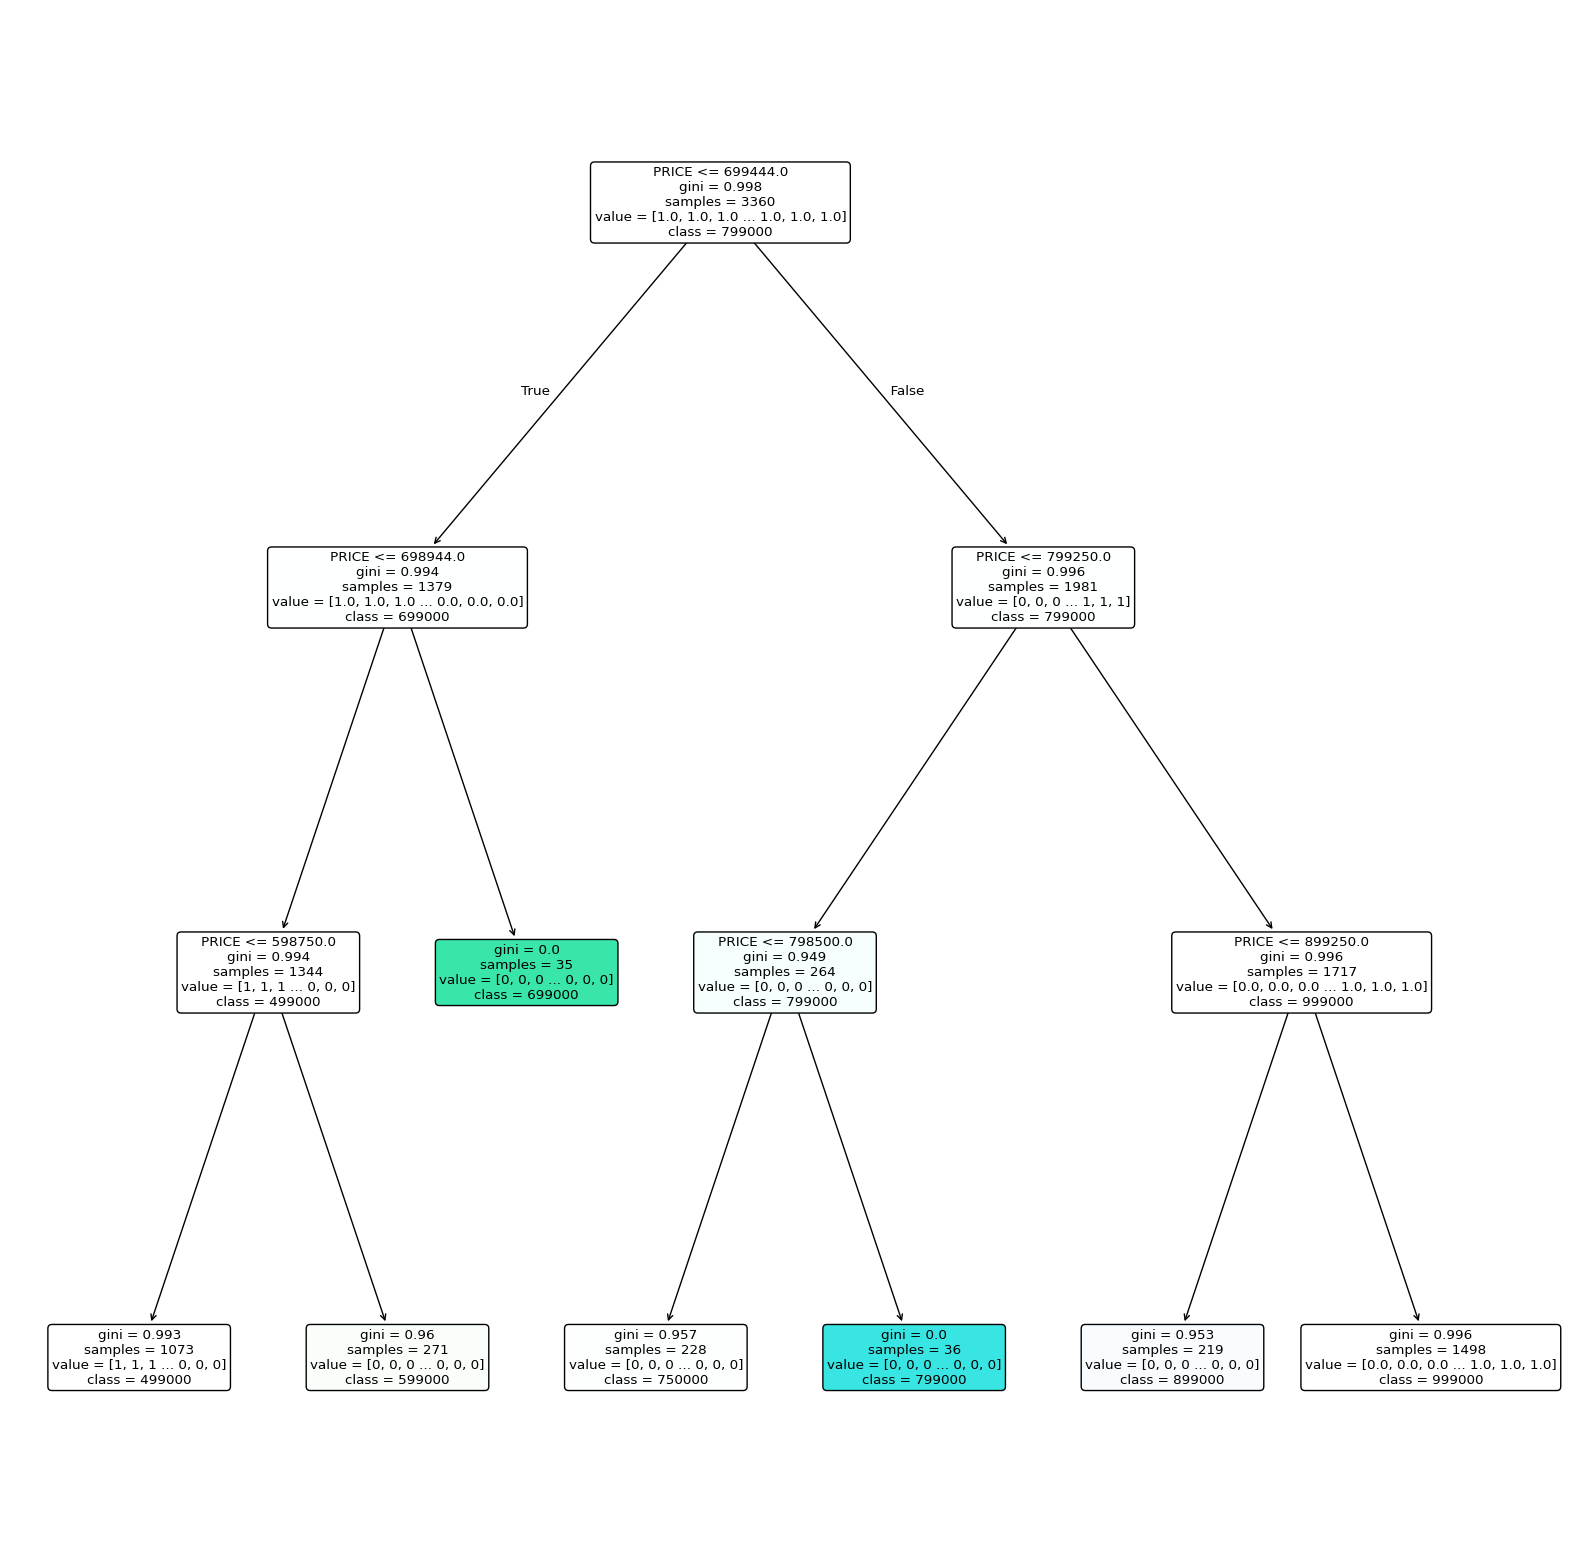

In [52]:
#plot the decision tree
plt.figure(figsize=(20,20))
tree.plot_tree(decision_tree,
               feature_names=x_train.columns,
               class_names=[str(i) for i in np.unique(y_train)],
               filled=True,
               rounded=True)
plt.show()

In [53]:
#Apply random forest model
random_forest = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=None, random_state=42)
random_forest.fit(x_train, y_train)
#make predictions
y_pred = random_forest.predict(x_test)

In [54]:
#get feautre importances from the model
feature_importances = random_forest.feature_importances_
features = x_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
#sort feature importances
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
0,PRICE,0.198928
4,LATITUDE,0.174399
5,LONGITUDE,0.173373
3,PROPERTYSQFT,0.134206
1,BEDS,0.079447
...,...,...
77,STREET_NAME_Canarsie,0.000000
170,STREET_NAME_Old Fulton Street,0.000000
68,STREET_NAME_Boerum Hill,0.000000
160,STREET_NAME_Morrison Avenue,0.000000


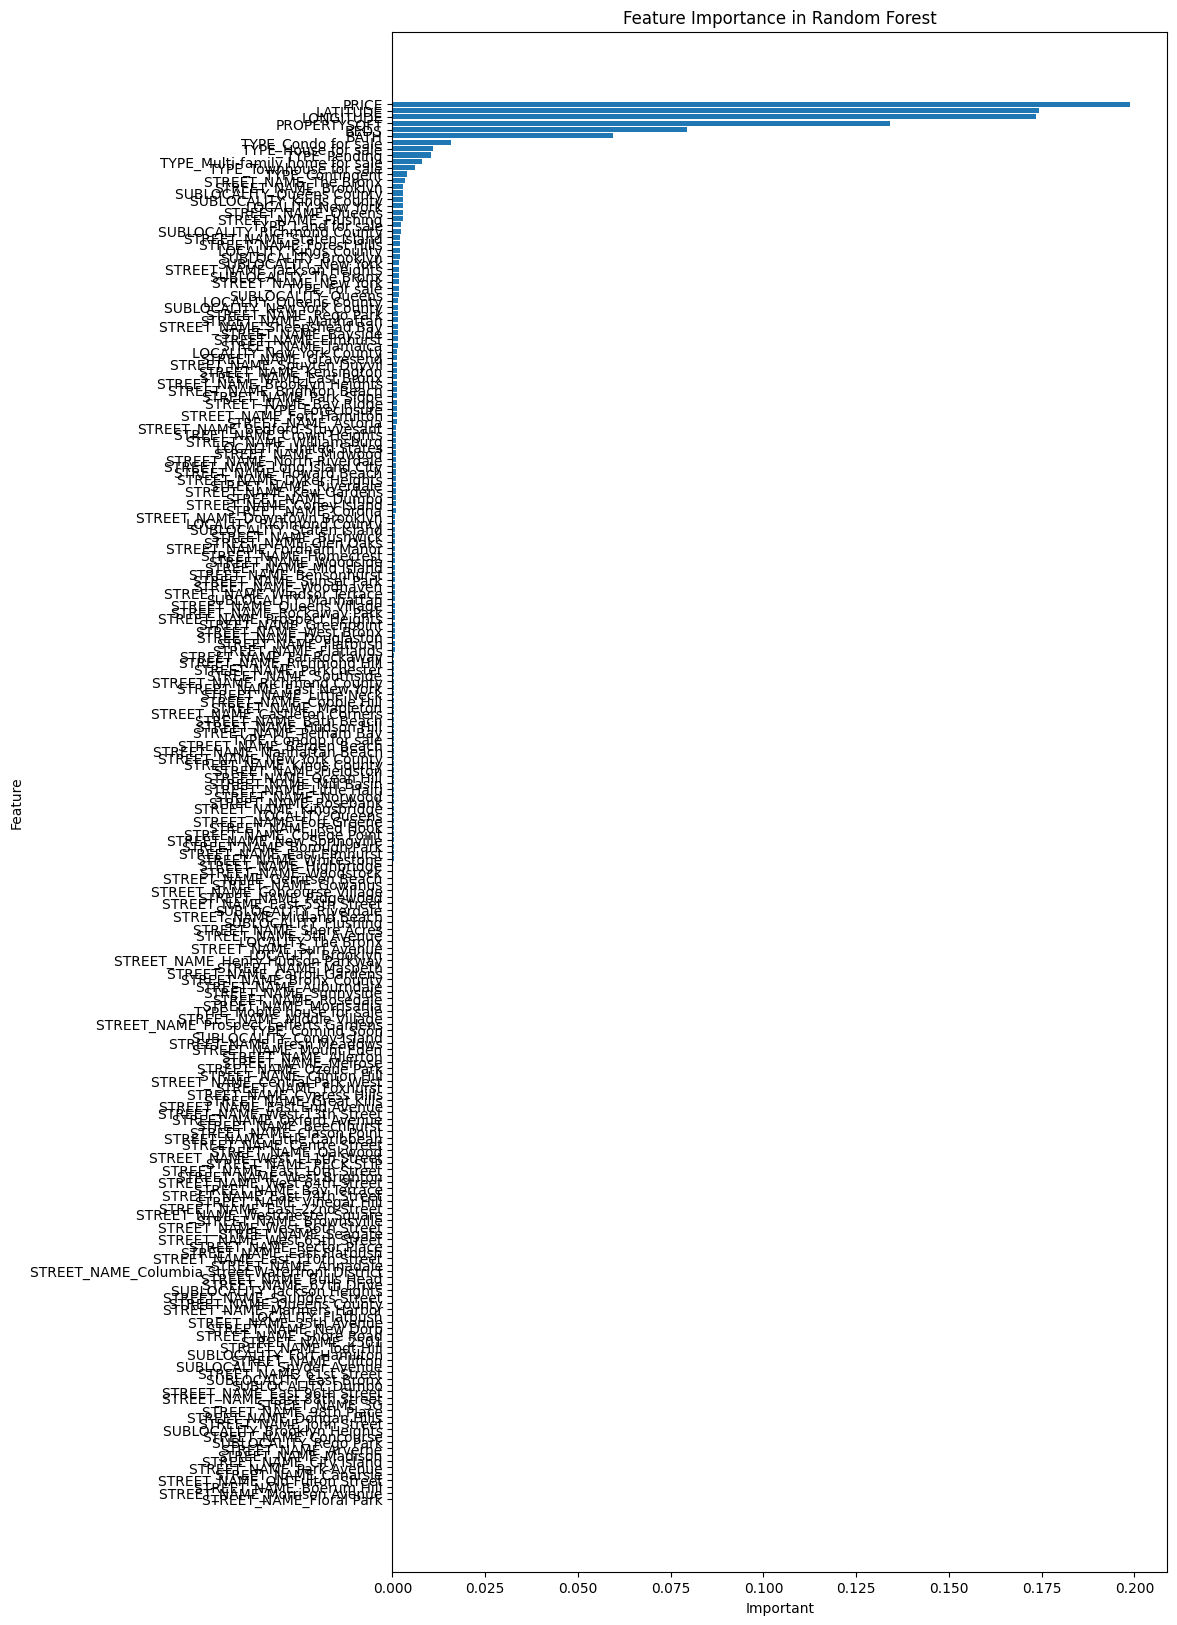

In [55]:
#plot the important features
plt.figure(figsize=(10, 20))
plt.barh(importance_df['Feature'],importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Important')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

In [56]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

#Display a classification report for precision, recall, F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

#Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.12
Classification Report:
               precision    recall  f1-score   support

        5800       0.00      0.00      0.00         1
       49500       0.00      0.00      0.00         1
       65000       0.00      0.00      0.00         1
       69000       0.00      0.00      0.00         1
       69900       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
       99000       0.50      0.75      0.60         4
      100000       0.00      0.00      0.00         1
      109000       0.00      0.00      0.00         1
      110000       0.00      0.00      0.00         1
      119000       1.00      1.00      1.00         1
      119888       0.00      0.00      0.00         1
      124900       0.00      0.00      0.00         0
      125000       0.00      0.00      0.00         2
      129000       0.00      0.00      0.00         0
      130000       0.00      0.00      0.00         1
      135000       0.00      0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [57]:
gbm = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

#fit model to training data
gbm.fit(x_train, y_train)
#predict on the testing set
y_pred = gbm.predict(x_test)

KeyboardInterrupt: 

In [58]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

#Display a classification report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

#Display a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.12
Classification Report:
               precision    recall  f1-score   support

        5800       0.00      0.00      0.00         1
       49500       0.00      0.00      0.00         1
       65000       0.00      0.00      0.00         1
       69000       0.00      0.00      0.00         1
       69900       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
       99000       0.50      0.75      0.60         4
      100000       0.00      0.00      0.00         1
      109000       0.00      0.00      0.00         1
      110000       0.00      0.00      0.00         1
      119000       1.00      1.00      1.00         1
      119888       0.00      0.00      0.00         1
      124900       0.00      0.00      0.00         0
      125000       0.00      0.00      0.00         2
      129000       0.00      0.00      0.00         0
      130000       0.00      0.00      0.00         1
      135000       0.00      0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [65]:
# Define categorical and numerical columns
categorical_cols = ['TYPE','LOCALITY','SUBLOCALITY', 'STREET_NAME']
numerical_cols = ['PRICE','BEDS','BATH','PROPERTYSQFT','LATITUDE','LONGITUDE']

#one-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(ny_status[categorical_cols])

#Create a DataFrame from encoded data
encoded_columns = encoder.get_feature_names_out(categorical_cols)
df_encoded = pd.DataFrame(encoded_data, columns=encoded_columns, index=ny_status.index)

#Combine numerical data and encoded categorical data
x = pd.concat([ny_status[numerical_cols], df_encoded], axis=1)
y = ny_status['PRICE']

# Scale the features for better performance of k-NN
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [68]:
#apply pca to the scales data
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(x_pca, columns=['Principal Component 1', 'Principal Component 2'])

pca_df.head()

,Principal Component 1,Principal Component 2
0,-0.333461,-0.134760
1,3.308521,0.584107
2,2.486403,-3.131163
3,0.540417,0.236341
4,3.013764,0.831526


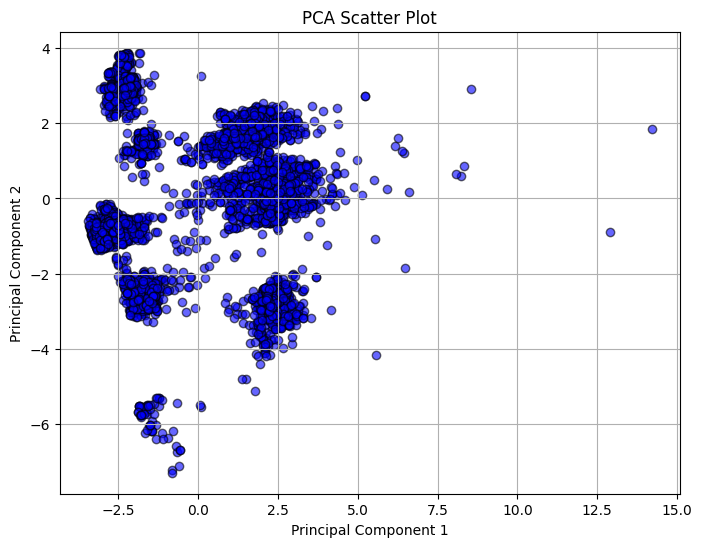

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.6, c='blue', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.grid(True)
plt.show()

In [70]:
#split the data
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=42)
#set k values initially to 5
k = 5
#apply define model
knn_model = KNeighborsClassifier(n_neighbors=k)
#apply to the training data
knn_model.fit(x_train, y_train)
#make predictions using the test data
y_pred = knn_model.predict(x_test)

In [71]:
#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.02
Classification Report:
               precision    recall  f1-score   support

        2494       0.00      0.00      0.00         0
        3225       0.00      0.00      0.00         0
        5800       0.00      0.00      0.00         1
       49500       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         0
       65000       0.00      0.00      0.00         1
       69000       0.00      0.00      0.00         1
       69900       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
       90000       0.00      0.00      0.00         0
       99000       0.00      0.00      0.00         4
      100000       0.00      0.00      0.00         1
      105509       0.00      0.00      0.00         0
      109000       0.00      0.00      0.00         1
      109500       0.00      0.00      0.00         0
      110000       0.00      0.00      0.00         1
      115000       0.00      0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [72]:
#Test different values of k and calculate the average accuracy
k_values = range(1,20)
accuracy_scores =[]

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, x_scaled, y, cv=5, scoring='accuracy')
  accuracy_scores.append(scores.mean())

#Find the best k value
best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best k value: {best_k}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

Best k value: 1


In [73]:
k = 1
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.08
Classification Report:
               precision    recall  f1-score   support

        2494       0.00      0.00      0.00         0
        3225       0.00      0.00      0.00         0
        5800       0.00      0.00      0.00         1
       49500       0.00      0.00      0.00         1
       65000       0.00      0.00      0.00         1
       69000       0.00      0.00      0.00         1
       69900       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
       99000       0.75      0.75      0.75         4
      100000       0.00      0.00      0.00         1
      109000       0.00      0.00      0.00         1
      110000       0.00      0.00      0.00         1
      119000       0.33      1.00      0.50         1
      119888       0.00      0.00      0.00         1
      125000       0.00      0.00      0.00         2
      129000       0.00      0.00      0.00         0
      130000       0.00      0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
#logistic regression: 0
#Decision tree: 0.07
#Random Forest: 0.12
#Gradient Boost: 0.12
#KNN: 0.02
#KNN after tuning: 0.08

#The best model in this experimental case are the random forest and gradient boost